In [4]:
import cv2
import mediapipe as mp
import os

import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

Physical devices cannot be modified after being initialized


In [6]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [8]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [9]:
# data = tf.keras.utils.image_dataset_from_directory('better_grayscale_resize_1and2',label_mode='categorical',batch_size=40) - less than 5% val_loss and 98% val_accuracy
data = tf.keras.utils.image_dataset_from_directory('better_grayscale_resize_1and2',label_mode='categorical',batch_size=60)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

KeyboardInterrupt: 

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(
    'better_grayscale_resize_1and2',
    label_mode='categorical',
    batch_size=60,
    color_mode='grayscale'
)

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


Found 129990 files belonging to 24 classes.


In [ ]:
test = cv2.imread("better_grayscale_resize_1and2\A\AB9 (2).jpg")
# cv2.imshow("esrs",test)
test.shape

(250, 250, 3)

In [ ]:
1,0,0,0,0,0,0,0,0,0

In [ ]:
.09,.5,,.5

In [ ]:
batch[0].shape

(60, 256, 256, 3)

In [ ]:
batch[1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 

d:\Anaconda\envs\mediapipe\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


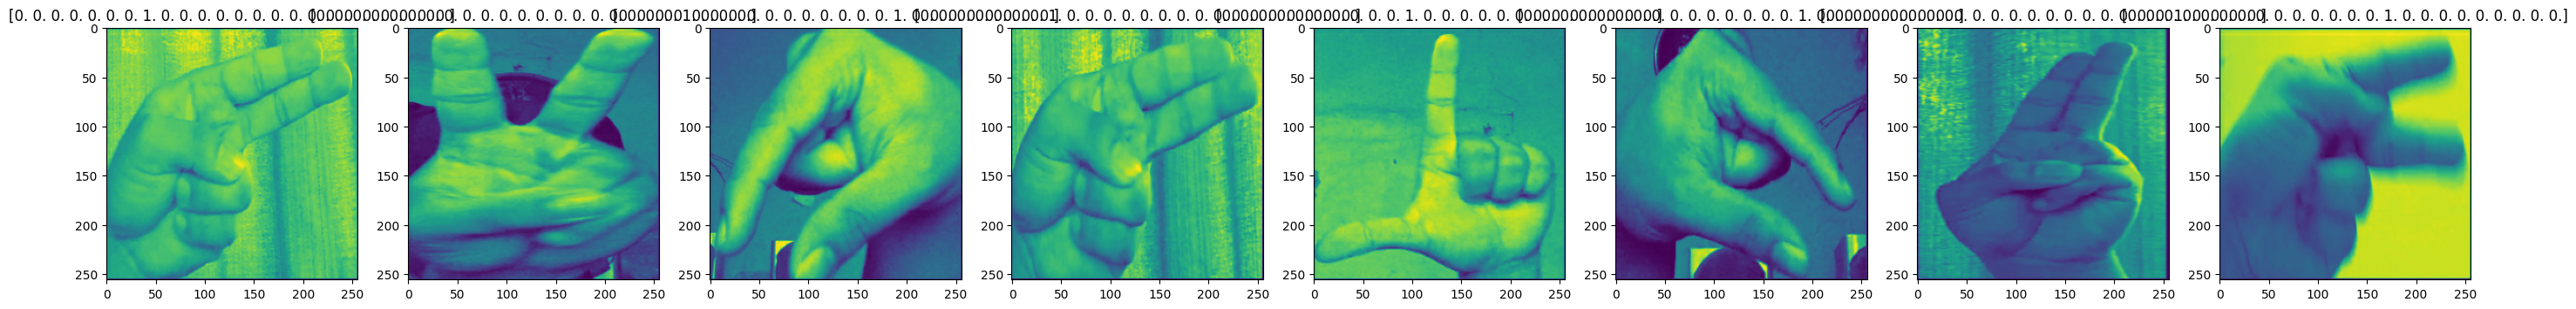

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(35,35))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# normalize data to have a value if 0-1
scaled = batch[0]/255

# check if normalization was successful

# scaled.min()

In [ ]:
scaled.max()

1.0

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()


In [ ]:
scaled_iterator.next()[0].max()

1.0

In [ ]:
len(data)

2167

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+2
test_size = int(len(data)*.1)
total_size = train_size + val_size + test_size
total_size


2167

In [ ]:
# this is for partitioning the datasets
# skip -> dont take
# take -> append
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
# model = Sequential()

# model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(32, (3,3), 1, activation='relu' ))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Flatten())

# model.add(Dense(256, activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(12, activation = 'softmax'))

# model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# model.summary()


In [ ]:
# model = Sequential()

# model.add(Conv2D(64, (5,5), 1, activation = 'relu', input_shape = (256,256,3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(32, (3,3), 1, activation='relu' ))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Flatten())

# model.add(Dense(256, activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(12, activation = 'softmax'))

# model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# model.summary()


In [ ]:
# model = Sequential()

# model.add(Conv2D(128, (5,5), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))


# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Flatten())

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(24, activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()


In [ ]:
# THIS IS A GRID SEARCH -> CONSIDER USING IT WHEN YOU HAVE TONS OF TIME AFK FROM PC...IT TRIES OUT EVERY POSSIBLE SPECIFIED HYPERPARAMETERS
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the model architecture as a function
def create_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Conv2D(20, (3,3), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(45, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(90, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(24, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid to search over
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Perform grid search using 5-fold cross validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(train)

# Print the best parameters and corresponding score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
x_train = []
y_train = []

for image_batch, label_batch in train.map(lambda x, y: (x, y)):
    x_train.append(image_batch.numpy())
    y_train.append(label_batch.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

# # Extract x_val and y_val
# x_val = []
# y_val = []

# for image_batch, label_batch in val_ds.map(lambda x, y: (x, y)):
#     x_val.append(image_batch.numpy())
#     y_val.append(label_batch.numpy())

# x_val = np.concatenate(x_val, axis=0)
# y_val = np.concatenate(y_val, axis=0)

# # Extract x_test and y_test
# x_test = []
# y_test = []

# for image_batch, label_batch in test_ds.map(lambda x, y: (x, y)):
#     x_test.append(image_batch.numpy())
#     y_test.append(label_batch.numpy())

# x_test = np.concatenate(x_test, axis=0)
# y_test = np.concatenate(y_test, axis=0)

: 

: 

In [ ]:
# CONSIDER USING GRID SEARCH---> trying out all specified hyperparameters then outputng the best performing one
strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
with strategy.scope():

    model = Sequential()

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,1)))
    model.add(MaxPooling2D())
    model.add(Dropout(0.20))
# -----------------------------------------------------------------------------
    model.add(Conv2D(35, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.20))
# -----------------------------------------------------------------------------
    model.add(Conv2D(80, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.20))
# -----------------------------------------------------------------------------
    model.add(Conv2D(150, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
# -----------------------------------------------------------------------------


# -----------------------------------------------------------------------------
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(24, activation='softmax'))

    optimizer = keras.optimizers.Adam(learning_rate=.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 35)      5075      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 35)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 62, 62, 35)       

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
with strategy.scope():
    # hist = model.fit(train, epochs=18, validation_data=val, callbacks=[tensorboard_callback])
    hist = model.fit(train, epochs=10, validation_data=val, callbacks=[early_stop])

Epoch 1/10
1516/1516 [==============================] - 2395s 2s/step - loss: 0.4229 - accuracy: 0.8668 - val_loss: 0.1993 - val_accuracy: 0.9440
Epoch 2/10
1516/1516 [==============================] - 1805s 1s/step - loss: 0.1972 - accuracy: 0.9359 - val_loss: 0.0995 - val_accuracy: 0.9726
Epoch 3/10
1516/1516 [==============================] - 1799s 1s/step - loss: 0.1414 - accuracy: 0.9540 - val_loss: 0.1005 - val_accuracy: 0.9736
Epoch 4/10
1516/1516 [==============================] - 1797s 1s/step - loss: 0.1160 - accuracy: 0.9626 - val_loss: 0.0740 - val_accuracy: 0.9786
Epoch 5/10
1516/1516 [==============================] - 1796s 1s/step - loss: 0.0981 - accuracy: 0.9677 - val_loss: 0.0576 - val_accuracy: 0.9830
Epoch 6/10
1516/1516 [==============================] - 1795s 1s/step - loss: 0.0921 - accuracy: 0.9708 - val_loss: 0.0329 - val_accuracy: 0.9910
Epoch 7/10
1516/1516 [==============================] - 1797s 1s/step - loss: 0.0805 - accuracy: 0.9744 - val_loss: 0.0407 -

In [ ]:
model.save(os.path.join('models','handsignV16.h5'))

<function matplotlib.pyplot.show(close=None, block=None)>

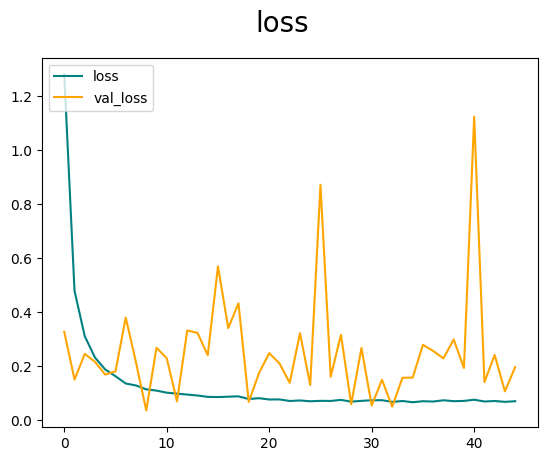

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label ='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label='val_loss' )
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

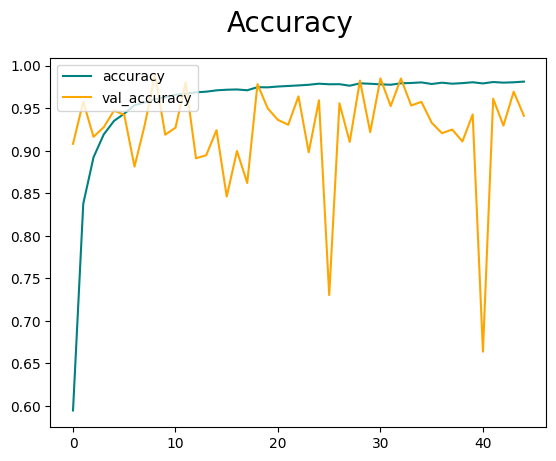

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label ='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label='val_accuracy' )
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 4s 4s/step


In [ ]:
print(f'Precision:{pre.result().numpy()} ,Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9423456192016602 ,Recall:0.9277166724205017, Accuracy:0.9333764314651489


In [ ]:
model.save(os.path.join('models','handsignV15.h5'))

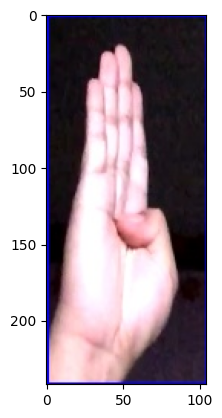

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('B_test3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


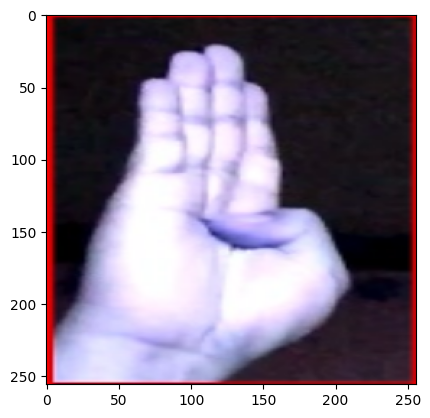

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# resize.shape
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
x=np.expand_dims(resize/255,0).max()

In [ ]:
# yhat = model.predict(np.expand_dims(resize/255,0))

yhat = model.predict(x)
yhat

ValueError: Failed to find data adapter that can handle input: <class 'numpy.float32'>, <class 'NoneType'>

In [ ]:
import cv2
import matplotlib.pyplot as plt

class_names = ['A', 'B', 'C'] 
img = cv2.imread('test_image270.jpg')
resize = tf.image.resize(img,(256,256))
resize.shape
np.expand_dims(resize,0).shape
yhat = model.predict(np.expand_dims(resize/255,0))
predicted_class = np.argmax(yhat)
predicted_class_name = class_names[predicted_class]
print(predicted_class_name)
print(yhat)

NameError: name 'model' is not defined

1/1 [==============================] - 0s 75ms/step


In [ ]:
# def predict(image):
#     img=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
#     img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
#     class_names = ['A', 'B', 'C'] 
#     img = cv2.imread('test_image270.jpg')
#     resize = tf.image.resize(img,(256,256))
#     # resize.shape
#     # np.expand_dims(resize,0).shape
#     yhat = model.predict(np.expand_dims(resize/255,0))
#     predicted_class = np.argmax(yhat)
#     predicted_class_name = class_names[predicted_class]
#     print(predicted_class_name)
#     print(yhat)
#     return str(yhat)

In [ ]:
import cv2
import mediapipe as mp
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

# Load both models
#ENSEMBLING 
model1 = load_model(os.path.join('models\handsignV16.h5'))
# model2 = load_model(os.path.join('models','handsignV15_2.h5'))


# Define class names
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

def predicting(image):

    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    resized_img = cv2.resize(gray_img, (256, 256))

    yhat1 = model1.predict(np.expand_dims(resized_img/255, 0))
    predicted_class1 = np.argmax(yhat1)

    predicted_class_avg = np.argmax(yhat1)


    predicted_class_name = class_names[predicted_class1]
    print(predicted_class_name)
    print(predicted_class_avg)

    return str(predicted_class_name)


In [ ]:
#     img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
#     resize = tf.image.resize(img, (256, 256)) 
#     # img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   

# #    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# #    
    # img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

In [1]:
import cv2
import mediapipe as mp
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

# Load both models
#ENSEMBLING 
model3 = load_model(os.path.join('models\handsignV14.h5'))
model1 = load_model(os.path.join('models\handsignV15.h5'))
model2 = load_model(os.path.join('models','handsignV15_2.h5'))


# Define class names
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

def predicting(image):
    gray_img = cv2.cvtColor(image, cv2.BRG2RGB)


    # gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # resized_img = cv2.resize(gray_img, (256, 256))
    # gray_img_3c = np.stack((resized_img,) * 3, axis=-1)



    # Predict using first model
    yhat1 = model1.predict(np.expand_dims(gray_img_3c/255, 0))
    predicted_class1 = np.argmax(yhat1)

    yhat3 = model3.predict(np.expand_dims(gray_img_3c/255, 0))
    predicted_class3 = np.argmax(yhat1)

    # Predict using second model
    yhat2 = model2.predict(np.expand_dims(gray_img_3c/255, 0))
    predicted_class2 = np.argmax(yhat2)

    # Compute average of predicted probabilities
    yhat_avg = (yhat1 + yhat2 + yhat3) / 3
    predicted_class_avg = np.argmax(yhat1)

    # Determine predicted class name
    if yhat_avg[0][predicted_class_avg] <= 0.42:
        predicted_class_name = '' 
    else:
        predicted_class_name = class_names[predicted_class_avg]

    predicted_class_name = class_names[predicted_class1]
    print(predicted_class_name)
    print(predicted_class_avg)

    return str(predicted_class_name)


In [5]:
import cv2
import mediapipe as mp
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

# Load both models
model1 = load_model(os.path.join('models','handsignV14.h5'))
model2 = load_model(os.path.join('models','handsignV15_2.h5'))

# Define class names
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

def predicting(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    resize = tf.image.resize(img, (256, 256))

    # Predict using first model
    yhat1 = model1.predict(np.expand_dims(resize/255, 0))
    predicted_class1 = np.argmax(yhat1)

    # Predict using second model
    yhat2 = model2.predict(np.expand_dims(resize/255, 0))
    predicted_class2 = np.argmax(yhat2)

    # Compute average of predicted probabilities
    yhat_avg = (yhat1 + yhat2) / 2
    predicted_class_avg = np.argmax(yhat_avg)

    # Determine predicted class name
    if yhat_avg[0][predicted_class_avg] <= 0.42:
        predicted_class_name = '' 
    else:
        predicted_class_name = class_names[predicted_class_avg]

    print(predicted_class_name)
    print(predicted_class_avg)

    return str(predicted_class_name)


In [12]:
test = 0
text =''

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(1) 

counter = 0
save_interval = 6  # Save every 6 frames
output_folder = "collectedimages"

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)


    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            x_min, x_max = frame.shape[1], 0
            y_min, y_max = frame.shape[0], 0

            for lm in hand_landmarks.landmark:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                if x < x_min:
                    x_min = x
                if x > x_max:
                    x_max = x
                if y < y_min:
                    y_min = y
                if y > y_max:
                    y_max = y


            offset = 30
            x_min -= offset
            x_max += offset
            y_min -= offset
            y_max += offset

            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            if x_min >= 0 and y_min >= 0 and x_max < frame.shape[1] and y_max < frame.shape[0]:
                hand_image = frame[y_min:y_max, x_min:x_max].copy()

                text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)[0]
                text_width = text_size[0]
                text_height = text_size[1]
                cv2.putText(frame, text, (x_min + (x_max - x_min) // 2 - text_width // 2, y_max + text_height + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
                
                if counter % save_interval == 0:
                    test=hand_image
                    
                    if not os.path.exists(output_folder):
                        os.makedirs(output_folder)
                    filename = os.path.join(output_folder, f"collectedimages{counter}.jpg")
                    cv2.imwrite(filename, frame)
                

                    text = predicting(test)
                


    cv2.imshow("Hand Detection", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    counter += 1

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 52ms/step
K
9
1/1 [==============================] - 0s 36ms/step
S
17
1/1 [==============================] - 0s 92ms/step
S
17
1/1 [==============================] - 0s 86ms/step
P
14
1/1 [==============================] - 0s 114ms/step
S
17
